In [71]:
import numpy as np
import xarray as xr
import os.path as op
from xmitgcm import open_mdsdataset
import xgcm.grid as xgd
from matplotlib import gridspec
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
ddir = '/swot/SUM05/dbalwada/channel_model_output/varying_res/10km/tracer_exp1'

In [73]:
nys,nyn = (50,150)
dsDiag = open_mdsdataset(ddir, iters=range(5188356,5235876,72),
                         prefix=['tracer1_diag'], delta_t=6e2
                        )
dsDiag

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:              (XC: 200, XG: 200, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41, time: 660)
Coordinates:
  * XC                   (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 ...
  * YC                   (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 ...
  * XG                   (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 ...
  * YG                   (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 ...
  * Z                    (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 ...
  * Zp1                  (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
  * Zu                   (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 ...
  * Zl                   (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
    rA                   (YC, XC) >f4 dask.array<shape=(200, 200), chunksize=(200, 200)>
    dxG                  (YG, XC) >f4 dask.array<shape=(200, 200), chunksize=(200, 200)>
 

In [44]:
print(dsDiag.TRAC01.attrs)
print(dsDiag.UTRAC01.attrs)
print(dsDiag.ForcTr01.attrs)

OrderedDict([('standard_name', 'TRAC01'), ('long_name', 'TRAC1 concentration'), ('units', 'kg/kg')])
OrderedDict([('standard_name', 'UTRAC01'), ('long_name', 'Zonal Mass-Weighted Transp of TRAC1'), ('units', 'kg/kg.m/s'), ('mate', 'VTRAC01')])
OrderedDict([('standard_name', 'ForcTr01'), ('long_name', 'TRAC1 forcing tendency'), ('units', 'kg/kg/s')])


In [4]:
grid = xgd.Grid(dsDiag, periodic=['X'])

In [5]:
dsMom = open_mdsdataset(ddir, iters=['5235840'], prefix=['vVeltave','wVeltave'], delta_t=6e2)
dsMom

/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:              (XC: 200, XG: 200, YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41, time: 1)
Coordinates:
    iter                 (time) int64 5235840
  * time                 (time) float64 3.142e+09
  * XC                   (XC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 ...
  * YC                   (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 ...
  * XG                   (XG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 ...
  * YG                   (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 ...
  * Z                    (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 ...
  * Zp1                  (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
  * Zu                   (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 ...
  * Zl                   (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
    rA                   (YC, XC) >f4 dask.array<shape=(200, 200), chunksize=(200, 20

In [6]:
dsDiag_clim = dsDiag.mean(['time','XC','XG'])
dsMom_clim = dsMom.mean(['time','XC','XG'])

In [7]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    dsDiag_clim.load()
    dsMom_clim.load()

[########################################] | 100% Completed | 19.4s
[########################################] | 100% Completed |  0.1s


In [81]:
dsMom_clim

<xarray.Dataset>
Dimensions:              (YC: 200, YG: 200, Z: 40, Zl: 40, Zp1: 41, Zu: 40, layer_1TH_bounds: 43, layer_1TH_center: 42, layer_1TH_interface: 41)
Coordinates:
  * YC                   (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 ...
  * YG                   (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 ...
  * Z                    (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 ...
  * Zp1                  (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
  * Zu                   (Zu) >f4 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 ...
  * Zl                   (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 ...
    drC                  (Zp1) >f4 5.0 10.0 10.0 11.0 13.0 15.0 17.5 20.5 ...
    drF                  (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 ...
    PHrefC               (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 ...
    PHrefF               (Zp1) >f4 0.0 98.1 196.2 294.3 412.02 549.36 706.32 ...
  * layer_1TH_bounds     (layer_1TH_bounds) >

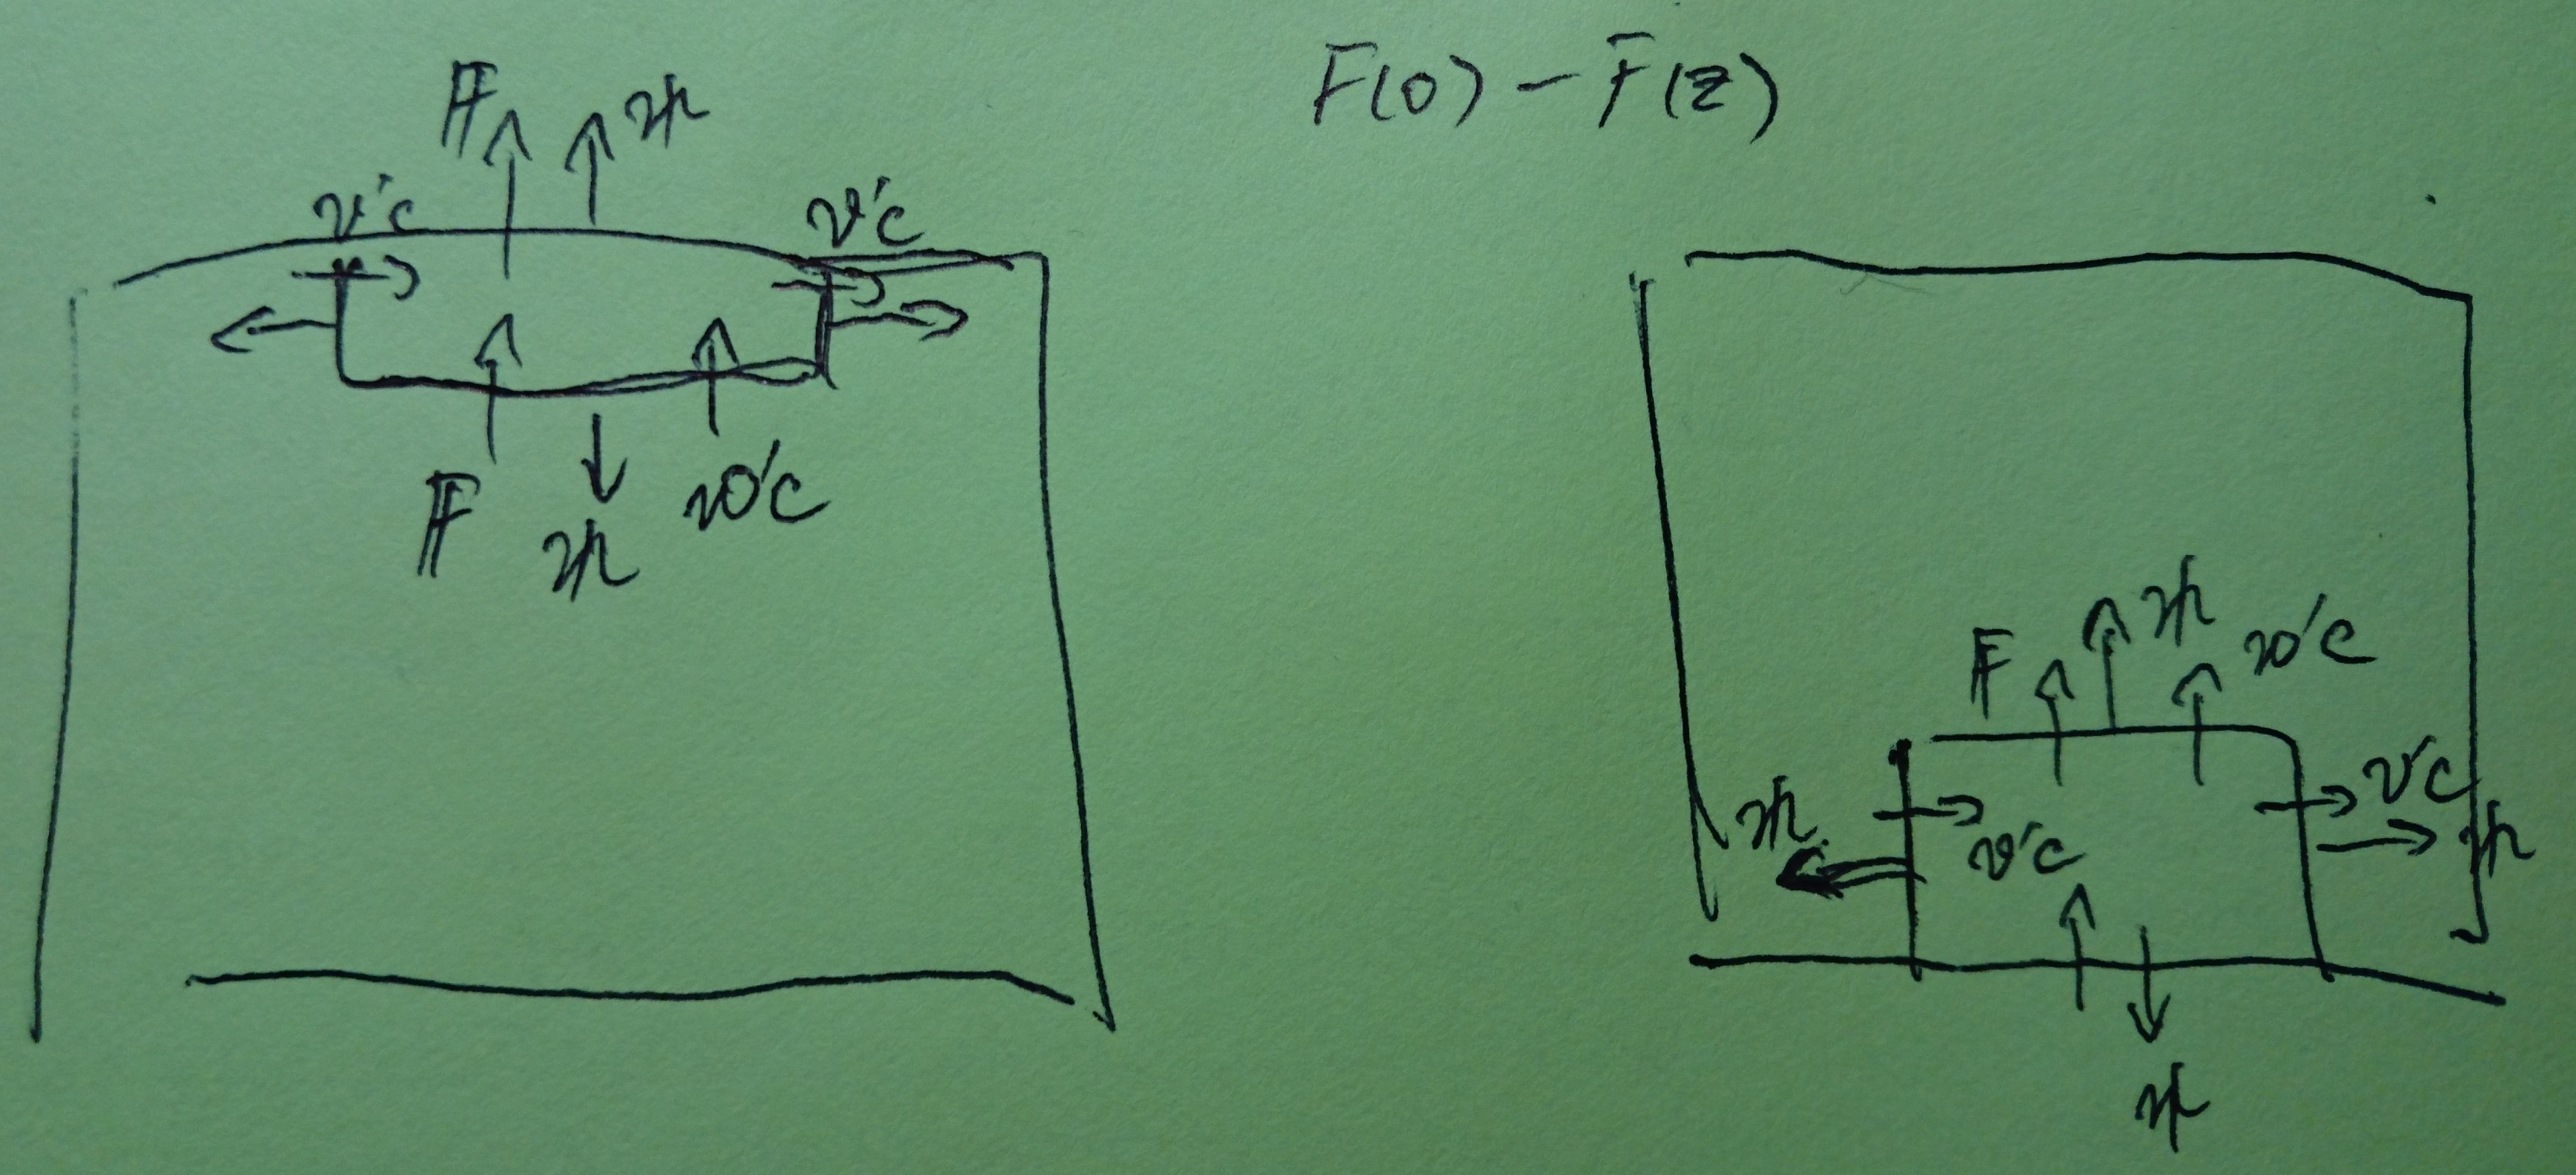

In [121]:
from IPython.display import Image
Image(op.join('/swot/SUM05/takaya/MITgcm/channel/runs/', 'DSC_7112.JPG'))

# Top box $(\int^0_z\ dV)$

$$\frac{d}{dt} \int\overline{c}\ dV = \int_I \overline{v}\ \overline{c}\ dA - \int_{III} \overline{v}\ \overline{c}\ dA + \int_{II} \overline{w}\ \overline{c}\ dA - \int_{IV} \overline{w}\ \overline{c}\ dA + \int_I \overline{v'c'}\ dA - \int_{III} \overline{v'c'}\ dA + \int_{II} \overline{w'c'}\ dA - \int_{IV} \overline{w'c'}\ dA - \int \frac{\partial}{\partial z} \overline{F}_v \ dV + \int \overline{\dot{c}}\ dV$$

## $$\overline{w'c} = \overline{wc} - \overline{w}c$$

In [59]:
# grid = xgd.Grid(dsMom_clim, periodic=['x'])
# wbarc = (dsDiag.TRAC01 * grid.interp(dsMom_clim.wVeltave,'Z',**{'boundary':'fill'})).mean(['time','XC'])
wbarc = (dsDiag_clim.TRAC01 * grid.interp(dsMom_clim.wVeltave,'Z',**{'boundary':'fill'}))
wc_bar = dsDiag_clim.WTRAC01

wpc_bar = wc_bar - wbarc 
wpc_bar

<xarray.DataArray (Z: 40, YC: 200)>
array([[ 0.000000e+00, -1.824504e-07, -1.279186e-06, ...,  1.016460e-06,
         3.172967e-06, -2.351859e-08],
       [ 0.000000e+00,  3.611100e-07, -1.521379e-06, ...,  4.515143e-07,
         4.022695e-08, -1.491756e-07],
       [ 0.000000e+00,  7.241919e-07, -1.810628e-06, ...,  4.721971e-07,
        -2.842353e-08, -3.374557e-07],
       ...,
       [ 0.000000e+00, -3.257744e-17,  2.655373e-18, ..., -4.904264e-15,
         4.905539e-15, -3.093265e-14],
       [ 0.000000e+00, -2.158605e-17,  2.302283e-18, ..., -3.253898e-15,
         4.383133e-15, -2.115001e-14],
       [ 0.000000e+00, -2.124649e-17,  6.720102e-18, ..., -3.093056e-15,
         5.770531e-15, -1.460839e-14]], dtype=float32)
Coordinates:
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC

In [63]:
wbarcIIT = grid.interp(wbarc * dsDiag.hFacC.mean(['XC']) * dsDiag.rA.mean(['XC']),
                     'Z', to='outer', boundary='fill')[:,nys:nyn].sum(['YC'])
wpc_barIIT = grid.interp(wpc_bar * dsDiag.hFacC.mean(['XC']) * dsDiag.rA.mean(['XC']),
                       'Z', to='outer', boundary='fill')[:,nys:nyn].sum(['YC'])

wbarcIVT = grid.interp(wbarc * dsDiag.hFacC.mean(['XC']) * dsDiag.rA.mean(['XC']),
                     'Z', to='outer', boundary='fill')[0,nys:nyn].sum(['YC'])
wpc_barIVT = grid.interp(wpc_bar * dsDiag.hFacC.mean(['XC']) * dsDiag.rA.mean(['XC']),
                       'Z', to='outer', boundary='fill')[0,nys:nyn].sum(['YC'])
wpc_barIVT

<xarray.DataArray 'mul-835841d646f9e441bd3141848d6f1a84' ()>
dask.array<shape=(), dtype=float32, chunksize=()>
Coordinates:
    Zp1      >f4 0.0

In [10]:
wbarcIVT

<xarray.DataArray 'mul-a831c0a83e7c1778605283844ebaf138' ()>
dask.array<shape=(), dtype=float32, chunksize=()>
Coordinates:
    Zp1      >f4 0.0

## $$\overline{v'c} = \overline{vc} - \overline{v}c$$

In [11]:
# grid = xgd.Grid(dsDiag_clim, periodic=['x'])
vbarc = (grid.interp(dsDiag.TRAC01,'Y',**{'boundary':'fill'}) * dsMom_clim.vVeltave).mean(['time','XC'])
vc_bar = dsDiag_clim.VTRAC01

vpc_bar = vc_bar - vbarc 
vpc_bar

<xarray.DataArray (Z: 40, YG: 200)>
dask.array<shape=(40, 200), dtype=float32, chunksize=(40, 1)>
Coordinates:
  * YG       (YG) >f4 0.0 10000.0 20000.0 30000.0 40000.0 50000.0 60000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 245.25 353.16 480.69 627.84 799.515 ...

In [12]:
vbarcIT = grid.cumsum(vbarc * dsDiag.hFacS.mean(['XC'])*dsDiag_clim.drF,
                     'Z', to='outer', boundary='fill')[:,nys].compute()
vpc_barIT = grid.cumsum(vc_bar * dsDiag.hFacS.mean(['XC'])*dsDiag_clim.drF,
                       'Z', to='outer', boundary='fill')[:,nys].compute()

vbarcIIIT = grid.cumsum(vbarc * dsDiag.hFacS.mean(['XC'])*dsDiag_clim.drF,
                       'Z', to='outer', boundary='fill')[:,nyn].compute()
vpc_barIIIT = grid.cumsum(vc_bar * dsDiag.hFacS.mean(['XC'])*dsDiag_clim.drF,
                         'Z', to='outer', boundary='fill')[:,nyn].compute()
vbarcIT

<xarray.DataArray 'concatenate-2b1ee1e33d8f821bb330fb769c27fcb1' (Zp1: 41)>
array([0.      , 0.423079, 0.75203 , 0.995318, 1.170165, 1.26189 , 1.30031 ,
       1.315136, 1.317864, 1.317629, 1.31819 , 1.318663, 1.318059, 1.317788,
       1.317633, 1.317536, 1.317475, 1.317434, 1.317419, 1.317413, 1.317412,
       1.317411, 1.317411, 1.317411, 1.317411, 1.317411, 1.317411, 1.317411,
       1.317411, 1.317411, 1.317411, 1.317411, 1.317411, 1.317411, 1.317411,
       1.317411, 1.317411, 1.317411, 1.317411, 1.317411, 1.317411],
      dtype=float32)
Coordinates:
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    YG       >f4 500000.0

## $$\int_V \frac{\partial}{\partial z} F_{diff}\ dV = \int_A \big[F_{diff}(0) - F_{diff}(z)\big]\ dA$$

In [15]:
diffc_bar = dsDiag_clim.DFrITr01
diffc_bar.attrs = dsDiag_clim.DFrITr01.attrs
diffc_bar

<xarray.DataArray 'DFrITr01' (Zl: 40, YC: 200)>
array([[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00, -1.291554e+03, -1.223859e+03, ..., -5.395207e+00,
        -2.501355e+00, -1.951544e-02],
       [ 0.000000e+00, -1.288419e+03, -1.219855e+03, ..., -4.536183e+00,
        -2.147547e+00, -6.483675e-02],
       ...,
       [ 0.000000e+00, -1.575867e-10, -2.487007e-15, ..., -1.144184e-08,
         2.054414e-09, -1.468315e-09],
       [ 0.000000e+00, -5.136505e-11,  2.119865e-11, ..., -1.761873e-09,
         5.128804e-09,  1.103046e-10],
       [ 0.000000e+00, -6.233024e-12,  9.606031e-11, ...,  6.664575e-09,
         2.759762e-08, -7.911230e-09]], dtype=float32)
Coordinates:
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * Zl       (Zl) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...

In [17]:
diffc_IIT = xr.DataArray(np.zeros_like(diffc_bar),
                         dims=wc_bar.dims, coords=wc_bar.coords)
diffc_IIT[:] = np.nan
for i in range(len(wbarc.Z)):
    diffc_IIT[i] = diffc_bar[0].data - diffc_bar[i].data
    
# tbin = range(0,390,30)
# diffe_II = xr.DataArray(diffe_II.mean(axis=-1).sum(axis=-1).reshape((5,360,40)),
#                         dims=['iYEAR','iDAY','Z'],
#                         coords={'iYEAR':range(5),'iDAY':range(360),'Z':ds.Z.data}
#                        ).groupby_bins('iDAY',tbin,right=False
#                                      ).mean(['iYEAR','iDAY']).compute()

# grid = xgd.Grid(dsDiag_clim, periodic=['x'])
diffc_IIT = grid.interp(diffc_IIT, 'Z', to='outer', boundary='fill')[:,nys:nyn].sum(['YC'])
diffc_IIT.attrs['unit'] = 'mmol Fe s^-1'
diffc_IIT

<xarray.DataArray (Zp1: 41)>
array([0.000000e+00, 2.578401e+04, 5.129285e+04, 5.063502e+04, 4.947777e+04,
       4.743015e+04, 4.401486e+04, 3.881790e+04, 3.180415e+04, 2.350040e+04,
       1.514110e+04, 7.532108e+03, 2.042849e+03, 7.925778e+01, 7.359289e+00,
       3.267431e+00, 1.823501e+00, 1.024271e+00, 7.378103e-01, 4.386156e-01,
       1.235101e-01, 6.478964e-02, 2.978927e-02, 1.210141e-02, 4.310293e-03,
       1.400148e-03, 4.583934e-04, 1.592587e-04, 5.262619e-05, 1.485545e-05,
       3.755790e-06, 1.092630e-06, 4.877558e-07, 4.697623e-07, 3.535596e-07,
       1.659884e-07, 1.083261e-07, 9.029296e-08, 6.768470e-08, 3.624433e-08,
       1.059907e-08], dtype=float32)
Coordinates:
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
Attributes:
    unit:     mmol Fe s^-1

## $$\int \overline{\dot{c}}\ dV$$

In [18]:
frc_bar = dsDiag_clim.ForcTr01
frc_bar

<xarray.DataArray 'ForcTr01' (Z: 40, YC: 200)>
array([[0.000000e+00, 1.295506e-06, 1.229409e-06, ..., 5.827720e-09,
        2.757608e-09, 5.891446e-10],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)
Coordinates:
  * YC       (YC) >f4 5000.0 15000.0 25000.0 35000.0 45000.0 55000.0 65000.0 ...
  * Z        (Z) >f4 -5.0 -15.0 -25.0 -36.0 -49.0 -64.0 -81.5 -102.0 -126.0 ...
    drF      (Z) >f4 10.0 10.0 10.0 12.0 14.0 16.0 19.0 22.0 26.0 30.0 36.0 ...
    PHrefC   (Z) >f4 49.05 147.15 2

In [19]:
frc_barT = grid.cumsum(frc_bar * dsDiag.drF*dsDiag.rA.mean(['XC'])*dsDiag.hFacC.mean(['XC']),
                        'Z', to='outer', boundary='fill')[:,nys:nyn].sum(['YC']).compute()
frc_barT

<xarray.DataArray 'concatenate-b5be606ebe9fe868d7a5c8823c3f5024' (Zp1: 41)>
array([    0.  , 52175.62, 52175.62, 52175.62, 52175.62, 52175.62, 52175.62,
       52175.62, 52175.62, 52175.62, 52175.62, 52175.62, 52175.62, 52175.62,
       52175.62, 52175.62, 52175.62, 52175.62, 52175.62, 52175.62, 52175.62,
       52175.62, 52175.62, 52175.62, 52175.62, 52175.62, 52175.62, 52175.62,
       52175.62, 52175.62, 52175.62, 52175.62, 52175.62, 52175.62, 52175.62,
       52175.62, 52175.62, 52175.62, 52175.62, 52175.62, 52175.62],
      dtype=float32)
Coordinates:
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...

## $$\int \overline{\frac{\partial c}{\partial t}}^{tx}\ dV = \frac{1}{T}\int \big[ \overline{c}^x(T) - \overline{c}^x(0)\big]\ dV$$

In [84]:
cvol = (dsDiag.TRAC01 * dsDiag.drF*dsDiag.rA*dsDiag.hFacC).mean(['XC'])
dcvoldt_barT = grid.cumsum((-cvol[0]+cvol[-1])/(-cvol.time[0]+cvol.time[-1]),
                           'Z', to='outer', boundary='fill'
                          )[:,nys:nyn].sum(['YC']).compute()
dcvoldt_barT

<xarray.DataArray 'concatenate-b7927f5a72bfd48cc97f174187fbf3d5' (Zp1: 41)>
array([    0.      ,   203.87991 ,   418.497668,   640.313004,   918.778248,
        1305.657038,  1988.559825,  3336.77158 ,  5548.564051,  9026.679278,
       13860.562432, 19989.809948, 26440.356356, 32033.738976, 36514.60602 ,
       39971.247985, 42546.417828, 44431.695746, 45544.879659, 46160.528338,
       46476.890148, 46627.957035, 46691.840291, 46715.771936, 46724.002675,
       46726.810371, 46727.857661, 46728.234371, 46728.34915 , 46728.382654,
       46728.393501, 46728.396792, 46728.397725, 46728.398002, 46728.398076,
       46728.398094, 46728.398099, 46728.398101, 46728.398102, 46728.398102,
       46728.398102])
Coordinates:
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...

In [85]:
nx = 200
Lx = nx*1e4

resT = (dcvoldt_barT*nx 
       - ((vbarcIT-vbarcIIIT + vpc_barIT-vpc_barIIIT)*Lx
          + (wbarcIIT-wbarcIVT.values + wpc_barIIT-wpc_barIVT.values)*nx 
          - diffc_IIT*nx 
          + frc_barT*nx)).compute()
resT

<xarray.DataArray (Zp1: 41)>
array([       0.      , -4902113.017985,   482809.533524,   573226.600798,
         537996.649525,   442782.407632,   404389.96493 ,   427350.315967,
         490715.810206,   586203.855674,   693110.486483,   692159.489546,
         537236.271174,   478482.2952  ,   500949.704069,   436454.597033,
         358518.565672,   296402.149104,   225878.931771,   174882.667538,
         140300.029576,   119495.407095,   107352.058197,   100997.38727 ,
          98243.53501 ,    97322.074205,    97068.53214 ,    96988.874163,
          96957.830043,    96946.530746,    96942.700219,    96942.358358,
          96942.544927,    96941.600471,    96941.615241,    96941.618771,
          96941.619857,    96941.620239,    96941.620345,    96941.620397,
          96941.62043 ])
Coordinates:
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...

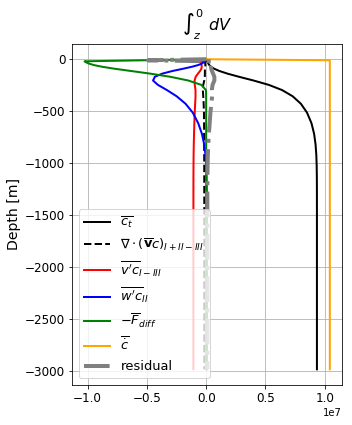

In [86]:
fig, ax1 = plt.subplots(figsize=(5,6))

ax1.plot(dcvoldt_barT*nx, dcvoldt_barT.Zp1, 'k', lw=2,
        label=r"$\overline{c_t}$")
ax1.plot((vbarcIT-vbarcIIIT)*Lx + (wbarcIIT-wbarcIVT.values)*nx, vbarcIT.Zp1, 'k--', lw=2,
        label=r'$\nabla\cdot (\overline{\mathbf{v}} c)_{I+II-III}$')
ax1.plot((vpc_barIT-vpc_barIIIT)*Lx, vpc_barIT.Zp1, 'r', lw=2,
        label=r"$\overline{v' c}_{I-III}$")
ax1.plot((wpc_barIIT-wpc_barIVT.values)*nx, wpc_barIIT.Zp1, 'b', lw=2,
        label=r"$\overline{w' c}_{II}$")
ax1.plot(-diffc_IIT*nx, diffc_IIT.Zp1, 'g', lw=2,
        label=r"$-\overline{F}_{diff}$")
ax1.plot(frc_barT*nx, frc_barT.Zp1, 'orange', lw=2,
        label=r"$\overline{\dot{c}}$")
ax1.plot(resT, resT.Zp1, '-.', color='grey', lw=4,
        label=r"residual")
# ax1.plot(-rhs[:20], rhs.Z[:20], 'k',
#         label=r"RHS")

# ax2.plot((np.absolute(wpc_barII*Lx+diffc_II*nx)
#           /(np.absolute(vbarcI-vbarcIII+wbarcII+vpc_barI-vpc_barIII)*Lx))[:20],
#          wpc_barII.Zp1[:20], 'k')
# ax2.set_xscale('log')

# ax1.set_xscale('symlog', linthreshx=1e6)
ax1.set_title(r"$\int^0_z\ dV$", fontsize=16, y=1.02)
# ax2.set_title(r"$\frac{|\overline{w' c}+\overline{F}_{diff}|}{|\nabla\cdot (\overline{\mathbf{v}} c)+\overline{v' c}|}$", 
#               fontsize=16, y=1.02)
ax1.legend(loc='lower left', fontsize=13)
ax1.set_ylabel(r'Depth [m]', fontsize=14)
ax1.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('Top-to-z_tracerfluxes.pdf')

# Bottom box $(\int^z_{-H}\ dV = \int^0_{-H}\ dV - \int^0_z\ dV)$

$$\frac{d}{dt} \int\overline{c}\ dV = \int_I \overline{v}\ \overline{c}\ dA - \int_{III} \overline{v}\ \overline{c}\ dA + \int_{II} \overline{w}\ \overline{c}\ dA - \int_{IV} \overline{w}\ \overline{c}\ dA + \int_I \overline{v'c'}\ dA - \int_{III} \overline{v'c'}\ dA + \int_{II} \overline{w'c'}\ dA - \int_{IV} \overline{w'c'}\ dA - \int \frac{\partial}{\partial z} \overline{F}_v \ dV + \int \overline{\dot{c}}\ dV$$

In [67]:
wbarcIIB = grid.interp(wbarc * dsDiag.hFacC.mean(['XC']) * dsDiag.rA.mean(['XC']),
                       'Z', to='outer', boundary='fill'
                      )[-1,nys:nyn].sum(['YC']).compute()
wpc_barIIB = grid.interp(wpc_bar * dsDiag.hFacC.mean(['XC']) * dsDiag.rA.mean(['XC']),
                        'Z', to='outer', boundary='fill'
                        )[-1,nys:nyn].sum(['YC']).compute()
wbarcIVB = grid.interp(wbarc * dsDiag.hFacC.mean(['XC']) * dsDiag.rA.mean(['XC']),
                       'Z', to='outer', boundary='fill'
                      )[:,nys:nyn].sum(['YC']).compute()
wpc_barIVB = grid.interp(wpc_bar * dsDiag.hFacC.mean(['XC']) * dsDiag.rA.mean(['XC']),
                        'Z', to='outer', boundary='fill'
                        )[:,nys:nyn].sum(['YC']).compute()
wpc_barIVB

<xarray.DataArray 'mul-835841d646f9e441bd3141848d6f1a84' (Zp1: 41)>
array([-2.482641e+02, -6.756741e+02, -9.973683e+02, -1.329347e+03,
       -2.040860e+03, -3.599498e+03, -6.168036e+03, -9.873508e+03,
       -1.442229e+04, -1.881148e+04, -2.190837e+04, -2.265884e+04,
       -2.059630e+04, -1.680557e+04, -1.268343e+04, -8.929191e+03,
       -5.906563e+03, -3.605441e+03, -2.026627e+03, -1.061042e+03,
       -5.135392e+02, -2.297544e+02, -9.308883e+01, -3.392115e+01,
       -1.121707e+01, -3.568352e+00, -1.161659e+00, -3.827877e-01,
       -1.198204e-01, -3.479143e-02, -9.698522e-03, -2.727717e-03,
       -7.706183e-04, -2.111756e-04, -5.330085e-05, -1.322908e-05,
       -3.620946e-06, -1.026850e-06, -2.704422e-07, -8.534201e-08,
       -1.934583e-08], dtype=float32)
Coordinates:
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...

In [27]:
wbarcIIB

<xarray.DataArray 'mul-a831c0a83e7c1778605283844ebaf138' ()>
array(-8.528231e-14, dtype=float32)
Coordinates:
    Zp1      >f4 -2985.0

In [28]:
cum = grid.cumsum(vbarc * dsDiag.hFacS.mean(['XC'])*dsDiag_clim.drF, 
                 'Z', to='outer', boundary='fill')
vbarcIB = (-cum[:,nys] + cum[-1,nys]).compute()
cum = grid.cumsum(vc_bar * dsDiag.hFacS.mean(['XC'])*dsDiag_clim.drF,
                 'Z', to='outer', boundary='fill')
vpc_barIB = (-cum[:,nys] + cum[-1,nys]).compute()

cum = grid.cumsum(vbarc * dsDiag.hFacS.mean(['XC'])*dsDiag_clim.drF,
                 'Z', to='outer', boundary='fill')
vbarcIIIB = (-cum[:,nyn] + cum[-1,nyn]).compute()
cum = grid.cumsum(vc_bar * dsDiag.hFacS.mean(['XC'])*dsDiag_clim.drF,
                 'Z', to='outer', boundary='fill') 
vpc_barIIIB = (-cum[:,nyn] + cum[-1,nyn]).compute()

vpc_barIIIB

<xarray.DataArray 'concatenate-c81f8dde7d0418df17b864e95f4c1085' (Zp1: 41)>
array([2.158396e+00, 1.643647e+00, 1.235840e+00, 9.447985e-01, 7.695482e-01,
       7.062873e-01, 6.731777e-01, 6.218209e-01, 5.291721e-01, 4.020736e-01,
       2.647146e-01, 1.520486e-01, 9.410214e-02, 7.787848e-02, 7.359600e-02,
       6.621265e-02, 5.334449e-02, 3.755808e-02, 2.431226e-02, 1.406169e-02,
       7.218122e-03, 3.223896e-03, 1.174927e-03, 3.740788e-04, 1.204014e-04,
       3.814697e-05, 1.001358e-05, 2.145767e-06, 4.768372e-07, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00], dtype=float32)
Coordinates:
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
    YG       >f4 1500000.0

In [29]:
diffc_IIB = xr.DataArray(np.zeros_like(diffc_bar),
                         dims=wc_bar.dims, coords=wc_bar.coords)
diffc_IIB[:] = np.nan
for i in range(len(diffc_bar.Zl)-1,0,-1):
    diffc_IIB[i] = diffc_bar[i].data - diffc_bar[-1].data
    
# tbin = range(0,390,30)
# diffe_II = xr.DataArray(diffe_II.mean(axis=-1).sum(axis=-1).reshape((5,360,40)),
#                         dims=['iYEAR','iDAY','Z'],
#                         coords={'iYEAR':range(5),'iDAY':range(360),'Z':ds.Z.data}
#                        ).groupby_bins('iDAY',tbin,right=False
#                                      ).mean(['iYEAR','iDAY']).compute()

# grid = xgd.Grid(dsDiag_clim, periodic=['x'])
diffc_IIB = grid.interp(diffc_IIB, 'Z', to='outer', boundary='fill')[:,nys:nyn].sum(['YC'])
diffc_IIB.attrs['unit'] = 'mmol Fe s^-1'
diffc_IIB

<xarray.DataArray (Zp1: 41)>
array([ 0.000000e+00,  0.000000e+00, -5.129285e+04, -5.063502e+04,
       -4.947777e+04, -4.743015e+04, -4.401486e+04, -3.881790e+04,
       -3.180415e+04, -2.350040e+04, -1.514110e+04, -7.532108e+03,
       -2.042849e+03, -7.925778e+01, -7.359289e+00, -3.267431e+00,
       -1.823501e+00, -1.024271e+00, -7.378102e-01, -4.386156e-01,
       -1.235101e-01, -6.478962e-02, -2.978926e-02, -1.210139e-02,
       -4.310273e-03, -1.400127e-03, -4.583723e-04, -1.592375e-04,
       -5.260499e-05, -1.483426e-05, -3.734591e-06, -1.071432e-06,
       -4.665577e-07, -4.485642e-07, -3.323614e-07, -1.447903e-07,
       -8.712794e-08, -6.909481e-08, -4.648657e-08, -1.504619e-08,
        0.000000e+00], dtype=float32)
Coordinates:
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...
Attributes:
    unit:     mmol Fe s^-1

In [30]:
cum = grid.cumsum(frc_bar * dsDiag.drF*dsDiag.rA.mean(['XC'])*dsDiag.hFacC.mean(['XC']),
                  'Z', to='outer', boundary='fill')
frc_barB = (-cum + cum[-1].data)[:,nys:nyn].sum(['YC']).compute()
frc_barB

<xarray.DataArray (Zp1: 41)>
array([52175.62,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
           0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
           0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
           0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
           0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ,
           0.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ],
      dtype=float32)
Coordinates:
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...

In [87]:
cvol = (dsDiag.TRAC01 * dsDiag.drF*dsDiag.rA*dsDiag.hFacC).mean(['XC'])
cum = grid.cumsum((-cvol[0]+cvol[-1])/(-cvol.time[0]+cvol.time[-1]),
                  'Z', to='outer', boundary='fill'
                 )
dcvoldt_barB = (-cum + cum[-1].values)[:,nys:nyn].sum(['YC']).compute()
dcvoldt_barB

<xarray.DataArray 'concatenate-b7927f5a72bfd48cc97f174187fbf3d5' (Zp1: 41)>
array([4.672840e+04, 4.652452e+04, 4.630990e+04, 4.608809e+04, 4.580962e+04,
       4.542274e+04, 4.473984e+04, 4.339163e+04, 4.117983e+04, 3.770172e+04,
       3.286784e+04, 2.673859e+04, 2.028804e+04, 1.469466e+04, 1.021379e+04,
       6.757150e+03, 4.181980e+03, 2.296702e+03, 1.183518e+03, 5.678698e+02,
       2.515080e+02, 1.004411e+02, 3.655781e+01, 1.262617e+01, 4.395427e+00,
       1.587731e+00, 5.404414e-01, 1.637313e-01, 4.895193e-02, 1.544842e-02,
       4.601054e-03, 1.310359e-03, 3.775157e-04, 9.979367e-05, 2.594607e-05,
       8.294920e-06, 2.864214e-06, 9.556572e-07, 4.242573e-07, 1.644184e-07,
       0.000000e+00])
Coordinates:
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...

In [88]:
resB = (dcvoldt_barB*nx 
       - ((vbarcIB-vbarcIIIB + vpc_barIB-vpc_barIIIB)*Lx
          + (wbarcIIB.values-wbarcIVB + wpc_barIIB.values-wpc_barIVB)*nx 
          - diffc_IIB*nx 
          + frc_barB*nx)).compute()
resB

<xarray.DataArray (Zp1: 41)>
array([ 9.694162e+04,  1.015586e+07, -3.858679e+05, -4.762840e+05,
       -4.410550e+05, -3.458408e+05, -3.074483e+05, -3.304087e+05,
       -3.937742e+05, -4.892622e+05, -5.961689e+05, -5.952169e+05,
       -4.402937e+05, -3.815402e+05, -4.040073e+05, -3.395127e+05,
       -2.615763e+05, -1.994601e+05, -1.289371e+05, -7.794044e+04,
       -4.335835e+04, -2.255349e+04, -1.041036e+04, -4.055610e+03,
       -1.301673e+03, -3.799054e+02, -1.262622e+02, -4.724015e+01,
       -1.542950e+01, -4.411248e+00, -1.169404e+00, -3.277389e-01,
       -8.978611e-02, -2.460522e-02, -6.003953e-03, -1.137546e-03,
       -1.990594e-04, -3.358509e-05,  2.233327e-05,  1.578289e-05,
        0.000000e+00])
Coordinates:
  * Zp1      (Zp1) >f4 0.0 -10.0 -20.0 -30.0 -42.0 -56.0 -72.0 -91.0 -113.0 ...

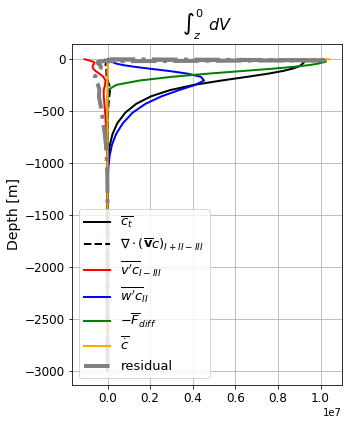

In [89]:
fig, ax1 = plt.subplots(figsize=(5,6))

ax1.plot(dcvoldt_barB*nx, dcvoldt_barB.Zp1, 'k', lw=2,
        label=r"$\overline{c_t}$")
ax1.plot((vbarcIB-vbarcIIIB)*Lx + (wbarcIIB.values-wbarcIVB)*nx, vbarcIB.Zp1, 'k--', lw=2,
        label=r'$\nabla\cdot (\overline{\mathbf{v}} c)_{I+II-III}$')
ax1.plot((vpc_barIB-vpc_barIIIB)*Lx, vpc_barIB.Zp1, 'r', lw=2,
        label=r"$\overline{v' c}_{I-III}$")
ax1.plot((wpc_barIIB.values-wpc_barIVB)*nx, wpc_barIVB.Zp1, 'b', lw=2,
        label=r"$\overline{w' c}_{II}$")
ax1.plot(-diffc_IIB*nx, diffc_IIB.Zp1, 'g', lw=2,
        label=r"$-\overline{F}_{diff}$")
ax1.plot(frc_barB*nx, frc_barB.Zp1, 'orange', lw=2,
        label=r"$\overline{\dot{c}}$")
ax1.plot(resB, resB.Zp1, '-.', color='grey', lw=4,
        label=r"residual")
# ax1.plot(-rhs[:20], rhs.Z[:20], 'k',
#         label=r"RHS")

# ax2.plot((np.absolute(wpc_barII*Lx+diffc_II*nx)
#           /(np.absolute(vbarcI-vbarcIII+wbarcII+vpc_barI-vpc_barIII)*Lx))[:20],
#          wpc_barII.Zp1[:20], 'k')
# ax2.set_xscale('log')

# ax1.set_xscale('symlog', linthreshx=1e6)
ax1.set_title(r"$\int^0_z\ dV$", fontsize=16, y=1.02)
# ax2.set_title(r"$\frac{|\overline{w' c}+\overline{F}_{diff}|}{|\nabla\cdot (\overline{\mathbf{v}} c)+\overline{v' c}|}$", 
#               fontsize=16, y=1.02)
ax1.legend(loc='lower left', fontsize=13)
ax1.set_ylabel(r'Depth [m]', fontsize=14)
ax1.grid(True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
# plt.savefig('Bot-to-z_tracerfluxes.pdf')

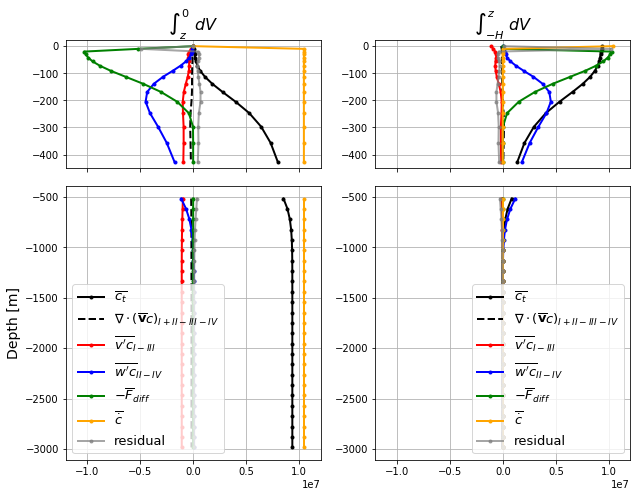

In [96]:
nz = 16

fig = plt.figure(figsize=(9,7))

gs = gridspec.GridSpec(3, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1:,0])
ax3 = fig.add_subplot(gs[0,1])
ax4 = fig.add_subplot(gs[1:,1])

ax1.plot(dcvoldt_barT[:nz]*nx, dcvoldt_barT.Zp1[:nz], 'k.-', lw=2,
        label=r"$\overline{c_t}$")
ax1.plot(((vbarcIT-vbarcIIIT)*Lx + (wbarcIIT-wbarcIVT.values)*nx)[:nz], vbarcIT.Zp1[:nz], 'k--', lw=2,
        label=r'$\nabla\cdot (\overline{\mathbf{v}} c)_{I+II-III-IV}$')
ax1.plot((vpc_barIT-vpc_barIIIT)[:nz]*Lx, vpc_barIT.Zp1[:nz], 'r.-', lw=2,
        label=r"$\overline{v' c}_{I-III}$")
ax1.plot((wpc_barIIT-wpc_barIVT.values)[:nz]*nx, wpc_barIIT.Zp1[:nz], 'b.-', lw=2,
        label=r"$\overline{w' c}_{II-IV}$")
ax1.plot(-diffc_IIT[:nz]*nx, diffc_IIT.Zp1[:nz], 'g.-', lw=2,
        label=r"$-\overline{F}_{diff}$")
ax1.plot(frc_barT[:nz]*nx, frc_barT.Zp1[:nz], '.-', color='orange', lw=2,
        label=r"$\overline{\dot{c}}$")
ax1.plot(resT[:nz], resT.Zp1[:nz], '.-', color='grey', lw=2, alpha=0.7,
        label=r"residual")

ax2.plot(dcvoldt_barT[nz:]*nx, dcvoldt_barT.Zp1[nz:], 'k.-', lw=2,
        label=r"$\overline{c_t}$")
ax2.plot(((vbarcIT-vbarcIIIT)*Lx + (wbarcIIT-wbarcIVT.values)*nx)[nz:], vbarcIT.Zp1[nz:], 'k--', lw=2,
        label=r'$\nabla\cdot (\overline{\mathbf{v}} c)_{I+II-III-IV}$')
ax2.plot((vpc_barIT-vpc_barIIIT)[nz:]*Lx, vpc_barIT.Zp1[nz:], 'r.-', lw=2,
        label=r"$\overline{v' c}_{I-III}$")
ax2.plot((wpc_barIIT-wpc_barIVT.values)[nz:]*nx, wpc_barIIT.Zp1[nz:], 'b.-', lw=2,
        label=r"$\overline{w' c}_{II-IV}$")
ax2.plot(-diffc_IIT[nz:]*nx, diffc_IIT.Zp1[nz:], 'g.-', lw=2,
        label=r"$-\overline{F}_{diff}$")
ax2.plot(frc_barT[nz:]*nx, frc_barT.Zp1[nz:], '.-', color='orange', lw=2,
        label=r"$\overline{\dot{c}}$")
ax2.plot(resT[nz:], resT.Zp1[nz:], '.-', color='grey', lw=2, alpha=0.7,
        label=r"residual")

ax3.plot(dcvoldt_barB[:nz]*nx, dcvoldt_barB.Zp1[:nz], 'k.-', lw=2,
        label=r"$\overline{c_t}$")
ax3.plot(((vbarcIB-vbarcIIIB)*Lx + (wbarcIIB.values-wbarcIVB)*nx)[:nz], vbarcIB.Zp1[:nz], 'k--', lw=2,
        label=r'$\nabla\cdot (\overline{\mathbf{v}} c)_{I+II-III-IV}$')
ax3.plot((vpc_barIB-vpc_barIIIB)[:nz]*Lx, vpc_barIB.Zp1[:nz], 'r.-', lw=2,
        label=r"$\overline{v' c}_{I-III}$")
ax3.plot((wpc_barIIB.values-wpc_barIVB)[:nz]*nx, wpc_barIVB.Zp1[:nz], 'b.-', lw=2,
        label=r"$\overline{w' c}_{II-IV}$")
ax3.plot(-diffc_IIB[:nz]*nx, diffc_IIB.Zp1[:nz], 'g.-', lw=2,
        label=r"$-\overline{F}_{diff}$")
ax3.plot(frc_barB[:nz]*nx, frc_barB.Zp1[:nz], '.-', color='orange', lw=2,
        label=r"$\overline{\dot{c}}$")
ax3.plot(resB[:nz], resB.Zp1[:nz], '.-', color='grey', lw=2, alpha=0.7,
        label=r"residual")

ax4.plot(dcvoldt_barB[nz:]*nx, dcvoldt_barB.Zp1[nz:], 'k.-', lw=2,
        label=r"$\overline{c_t}$")
ax4.plot(((vbarcIB-vbarcIIIB)*Lx + (wbarcIIB.values-wbarcIVB)*nx)[nz:], vbarcIB.Zp1[nz:], 'k--', lw=2,
        label=r'$\nabla\cdot (\overline{\mathbf{v}} c)_{I+II-III-IV}$')
ax4.plot((vpc_barIB-vpc_barIIIB)[nz:]*Lx, vpc_barIB.Zp1[nz:], 'r.-', lw=2,
        label=r"$\overline{v' c}_{I-III}$")
ax4.plot((wpc_barIIB.values-wpc_barIVB)[nz:]*nx, wpc_barIVB.Zp1[nz:], 'b.-', lw=2,
        label=r"$\overline{w' c}_{II-IV}$")
ax4.plot(-diffc_IIB[nz:]*nx, diffc_IIB.Zp1[nz:], 'g.-', lw=2,
        label=r"$-\overline{F}_{diff}$")
ax4.plot(frc_barB[nz:]*nx, frc_barB.Zp1[nz:], '.-', color='orange', lw=2,
        label=r"$\overline{\dot{c}}$")
ax4.plot(resB[nz:], resB.Zp1[nz:], '.-', color='grey', lw=2, alpha=0.7,
        label=r"residual")


ax1.set_title(r"$\int^0_z\ dV$", fontsize=16, y=1.028)
ax3.set_title(r"$\int^z_{-H}\ dV$", fontsize=16, y=1.028)

ax1.set_xlim([-1.2e7,1.2e7])
ax1.set_xticklabels([])
ax2.set_xlim([-1.2e7,1.2e7])
ax3.set_xlim([-1.2e7,1.2e7])
ax3.set_xticklabels([])
ax4.set_xlim([-1.2e7,1.2e7])

ax2.legend(loc='lower left', fontsize=13)
ax4.legend(loc='lower right', fontsize=13)
ax2.set_ylabel(r'Depth [m]', fontsize=14)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

plt.tight_layout()
plt.savefig(op.join('/swot/SUM05/takaya/MITgcm/channel/runs/','tracerfluxes_Dhruv-run.pdf'))